In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [0]:
df = pd.read_csv('nv_12_17_merged.csv')
df.head()

,Unnamed: 0,state,id,county,newspaper,date,notice_id,count_tags,combinations,combinations_clean,...,DOMESTIC_MIG,NET_MIG,RESIDUAL,GQ_ESTIMATES,R_birth,R_death,R_NATURAL_INC,R_INTERNATIONAL_MIG,R_DOMESTIC_MIG,R_NET_MIG
0,0,Nevada,3371/182013_19774443,Clark,Nevada Legal News,2013-01-08 00:00:00,19774443.0,1,1-Summon,1-Summon_3-Other,...,12059.0,17878.0,8.0,22785.0,13.082415,7.175415,5.907001,2.893336,5.996003,8.88934
1,1,Nevada,3371/182013_19774444,Clark,Nevada Legal News,2013-01-08 00:00:00,19774444.0,2,1-Summon_Board,1-Summon_3-Other,...,12059.0,17878.0,8.0,22785.0,13.082415,7.175415,5.907001,2.893336,5.996003,8.88934
2,2,Nevada,3371/182013_19774445,Clark,Nevada Legal News,2013-01-08 00:00:00,19774445.0,2,Minor_Parenting,1-Parenting,...,12059.0,17878.0,8.0,22785.0,13.082415,7.175415,5.907001,2.893336,5.996003,8.88934
3,3,Nevada,3371/182013_19774446,Clark,Nevada Legal News,2013-01-08 00:00:00,19774446.0,1,Creditors,Creditors,...,12059.0,17878.0,8.0,22785.0,13.082415,7.175415,5.907001,2.893336,5.996003,8.88934
4,4,Nevada,3371/182013_19774447,Clark,Nevada Legal News,2013-01-08 00:00:00,19774447.0,2,1-Summon_Board,1-Summon_3-Other,...,12059.0,17878.0,8.0,22785.0,13.082415,7.175415,5.907001,2.893336,5.996003,8.88934


In [0]:
# df.loc[df['year'] == 2014]

In [0]:

df['count']=df.groupby(['county','combinations_clean','month','year']).combinations_clean.transform('count')

In [0]:
print(len(df))
df.drop_duplicates(['county','notice_id'],inplace=True)
print(len(df))

370595
370595


In [0]:
df['count_pop'] = df['count']*10000/df['POP_ESTIMATE']

In [0]:
df.county.unique()

array(['Clark', 'Humboldt', 'Washoe', 'Carson', 'Nye', 'Elko',
       'Churchill', 'Douglas'], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


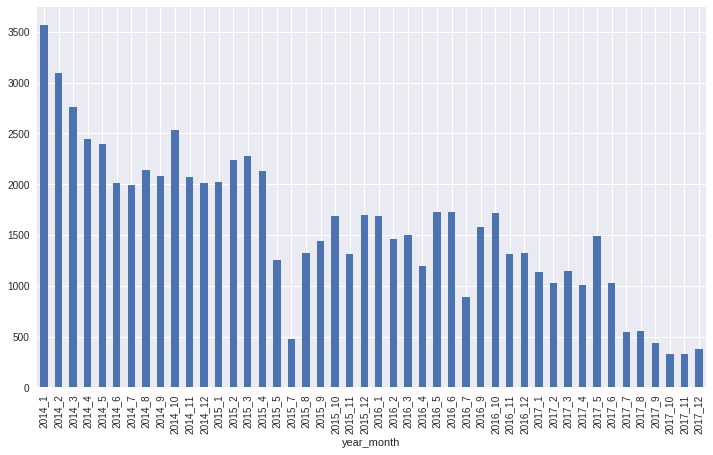

In [0]:
# temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

# temp_df = temp_df[temp_df['county'].isin(['Carson','Douglas','Churchill'])]

temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')

plt.rcParams['figure.figsize']=(12,7)
# pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                     values='count', aggfunc='count')
day_order = ['2014_1', '2014_2', '2014_3', '2014_4', '2014_5', '2014_6', '2014_7', '2014_8', '2014_9', '2014_10', '2014_11', '2014_12',
            '2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']
ax = pv.reindex(day_order).plot(kind="bar", legend=False)
# plt.axvspan(9, 14, color='red', alpha=0.5)
plt.show()
# plt.plot(pv)
# print(pv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

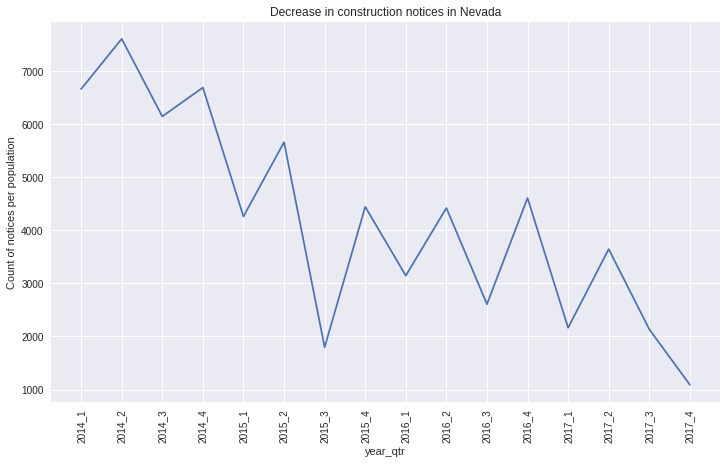

combinations_clean  1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default
year_qtr                                                                
2014_1                                                           6661   
2014_2                                                           7606   
2014_3                                                           6145   
2014_4                                                           6688   
2014_5                                                           2016   
2015_1                                                           4260   
2015_2                                                           5660   
2015_3                                                           1797   
2015_4                                                           4443   
2015_5                                                           1693   
2016_1                                                           3146   
2016_2                                             

In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default'])]

temp_df['qtr'] = temp_df['month']//3 + 1

temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]
temp_df["year_qtr"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["qtr"].values[i]) for i in range(len(temp_df))]

temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]

pv = pd.pivot_table(temp_df, index=temp_df.year_qtr, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count', fill_value=np.mean)

day_order = ['2014_1', '2014_2', '2014_3', '2014_4',
            '2015_1', '2015_2', '2015_3', '2015_4',
             '2016_1', '2016_2', '2016_3', '2016_4',
            '2017_1', '2017_2', '2017_3', '2017_4',]

plt.figure(figsize=(40,10))
ax = pv.reindex(day_order).plot(kind="line", title='Decrease in construction notices in Nevada',legend=False)

# plt.axvspan(9, 14, color='red', alpha=0.5)

plt.xticks(range(len(day_order)), day_order, rotation=90)
plt.ylabel('Count of notices per population')
plt.show()

# plt.plot(pv)
print(pv)

156
46 [nan]


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'height'
  s)


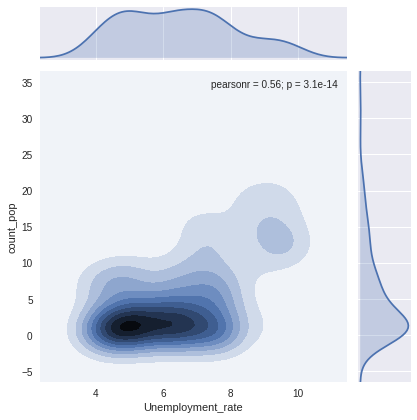

In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
temp_df = temp_df[~temp_df['county'].isin(['Carson','Humboldt','Clark'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
# pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
#                     values='Unemployment_rate', aggfunc='count')

# pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
#                     values='count', aggfunc='count')


temp_df = temp_df[['county','combinations_clean','Unemployment_rate','count_pop','count']].drop_duplicates(['county','combinations_clean', 'Unemployment_rate','count_pop','count'])

# ur = temp_df.groupby(['county','combinations_clean','year'], as_index=False)['Unemployment_rate'].mean()
# cp = temp_df.groupby(['county','combinations_clean','year'], as_index=False)['count_pop'].mean()

# df1 = pd.merge(ur, cp, on=['county','combinations_clean','year'])
# scaler = preprocessing.MinMaxScaler()
# df1[['count_pop']] = scaler.fit_transform(df1[['count_pop']])
# df1[['Unemployment_rate']] = scaler.fit_transform(df1[['Unemployment_rate']])
# df1['count_pop'] = np.log1p(df1['count_pop'])
# df1['Unemployment_rate'] = np.log1p(df1['Unemployment_rate'])

from matplotlib import rcParams

# figure size in inches
plt.figure(figsize=(16, 6))
sns.jointplot(data=temp_df, x='Unemployment_rate', y='count_pop', kind='kde', height=20)
print(len(temp_df))
print(len(df1), df1.county.unique())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

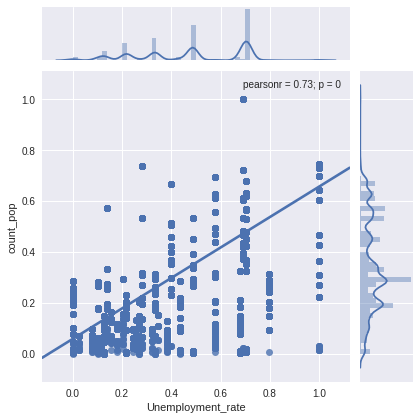

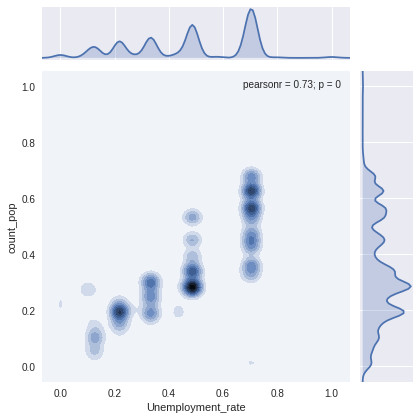

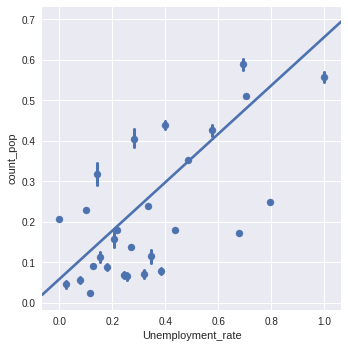

In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
# temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
# iris = sns.load_dataset("temp_df")
scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])
temp_df[['Unemployment_rate']] = scaler.fit_transform(temp_df[['Unemployment_rate']])

sns.jointplot(data=temp_df, x='Unemployment_rate', y='count_pop', kind='reg')
sns.jointplot(data=temp_df, x='Unemployment_rate', y='count_pop', kind='kde')
# plt.show()
# plt.scatter(temp_df.Unemployment_rate, temp_df.count_pop)
# print(len(temp_df.count))
sns.lmplot(x="Unemployment_rate", y="count_pop", data=temp_df, x_estimator=np.mean);

In [0]:
len(temp_df.Unemployment_rate)

115338

year         2014       2015       2016      2017
month                                            
1      10964485.0  2742277.0  2254090.0  643268.0
2       7894837.0  3508805.0  1609193.0  400100.0
3       5951857.0  3968640.0  1756066.0  525776.0
4       4375417.0  3546365.0  1029037.0  444232.0
5       4667625.0  1168661.0  1577761.0  960650.0
6       3155401.0        NaN  1632410.0  455365.0
7       3049192.0   195389.0   378514.0  150925.0
8       3334901.0  1445333.0        NaN  222282.0
9       3148925.0  1628905.0  1359997.0  156020.0
10      4410576.0  2469065.0  1625101.0   91600.0
11      3062941.0  1467610.0   814088.0   97162.0
12      2755825.0  2257525.0   974500.0  104425.0


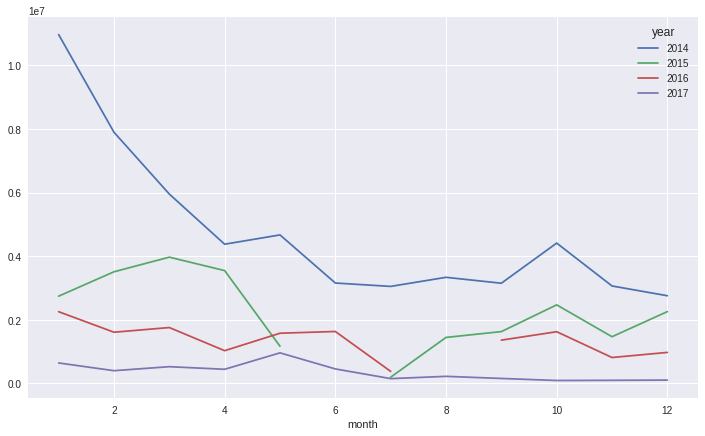

In [0]:
temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
temp_df = temp_df[temp_df['county'].isin(['Clark'])]
temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                    values='count', aggfunc='sum')

pv.plot()
print(pv)

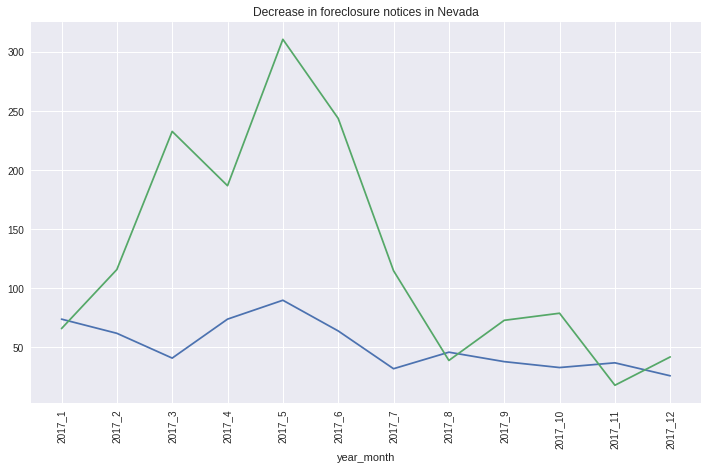

combinations_clean  1-Public Hearing  1-Summon_3-Other
year_month                                            
2017_1                            74                66
2017_10                           33                79
2017_11                           37                18
2017_12                           26                42
2017_2                            62               116
2017_3                            41               233
2017_4                            74               187
2017_5                            90               311
2017_6                            64               244
2017_7                            32               115
2017_8                            46                39
2017_9                            38                73


In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Public Hearing','1-Summon_3-Other'])]
temp_df = temp_df[~temp_df['county'].isin(['Clark'])]
temp_df['qtr'] = temp_df['month']//3 + 1

temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]
temp_df["year_qtr"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["qtr"].values[i]) for i in range(len(temp_df))]

temp_df = temp_df[temp_df['year'].isin(['2017'])]

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count', fill_value=np.mean)

day_order = ['2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']

plt.figure(figsize=(40,10))
ax = pv.reindex(day_order).plot(kind="line", title='Decrease in foreclosure notices in Nevada',legend=False)

# plt.axvspan(9, 14, color='red', alpha=0.5)

plt.xticks(range(len(day_order)), day_order, rotation=90)
plt.show()
# plt.plot(pv)
print(pv)

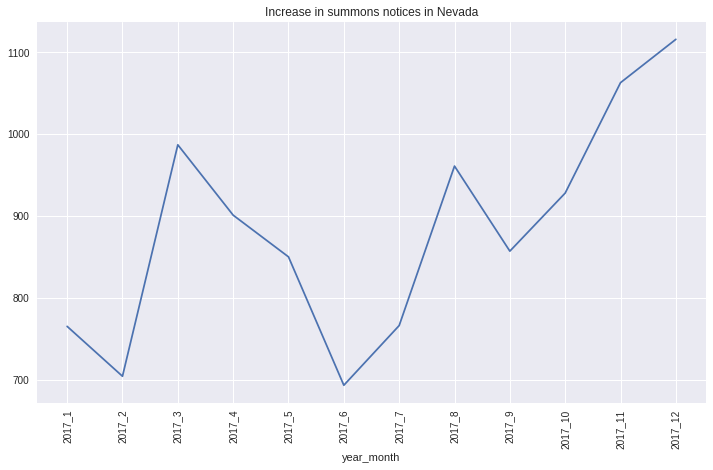

combinations_clean  1-Summon_3-Other
year_month                          
2017_1                           765
2017_10                          928
2017_11                         1063
2017_12                         1116
2017_2                           704
2017_3                           987
2017_4                           901
2017_5                           850
2017_6                           693
2017_7                           766
2017_8                           961
2017_9                           857


In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Summon_3-Other'])]
temp_df = temp_df[temp_df['county'].isin(['Clark'])]
temp_df['qtr'] = temp_df['month']//3 + 1

temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]
temp_df["year_qtr"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["qtr"].values[i]) for i in range(len(temp_df))]

temp_df = temp_df[temp_df['year'].isin(['2017'])]

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count', fill_value=np.mean)

day_order = ['2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']

plt.figure(figsize=(40,10))
ax = pv.reindex(day_order).plot(kind="line", title='Increase in summons notices in Nevada',legend=False)

# plt.axvspan(9, 14, color='red', alpha=0.5)

plt.xticks(range(len(day_order)), day_order, rotation=90)
plt.show()
# plt.plot(pv)
print(pv)

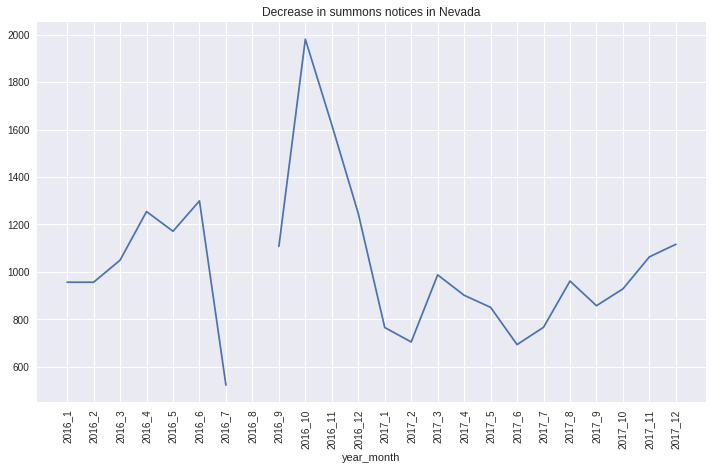

combinations_clean  1-Summon_3-Other
year_month                          
2016_1                           956
2016_10                         1981
2016_11                         1620
2016_12                         1246
2016_2                           956
2016_3                          1049
2016_4                          1254
2016_5                          1171
2016_6                          1299
2016_7                           522
2016_9                          1107
2017_1                           765
2017_10                          928
2017_11                         1063
2017_12                         1116
2017_2                           704
2017_3                           987
2017_4                           901
2017_5                           850
2017_6                           693
2017_7                           766
2017_8                           961
2017_9                           857


In [0]:
temp_df = df[df['combinations_clean'].isin(['1-Summon_3-Other'])]
temp_df = temp_df[temp_df['county'].isin(['Clark'])]
temp_df['qtr'] = temp_df['month']//3 + 1

temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]
temp_df["year_qtr"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["qtr"].values[i]) for i in range(len(temp_df))]

temp_df = temp_df[temp_df['year'].isin(['2016','2017'])]

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count', fill_value=np.mean)

day_order = ['2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_8', '2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']

plt.figure(figsize=(40,10))
ax = pv.reindex(day_order).plot(kind="line", title='Decrease in summons notices in Nevada',legend=False)

# plt.axvspan(9, 14, color='red', alpha=0.5)

plt.xticks(range(len(day_order)), day_order, rotation=90)
plt.show()
# plt.plot(pv)
print(pv)

In [0]:
# temp_df = df[df['combinations_clean'].isin(['License_Liquor','Liquor','Citation_Contractor_Council_Liquor_Maintenance',
#                                            'Board_Liquor','Council_License_Liquor','Council_Liquor','Board_Liquor_School','Council_Liquor_Vehicle'])]
temp_df = df
temp_df = df[df['combinations_clean'].str.contains("Creditors")]
temp_df = temp_df[temp_df['year'].isin([2013,2014,2015,2016,2017])]
scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

temp_df_m = temp_df[temp_df['county'].isin(['Clark'])]
temp_df_p = temp_df[~temp_df['county'].isin(['Clark'])]
m = temp_df_m.groupby(['year']).count()['count_pop']
p = temp_df_p.groupby(['year']).count()['count_pop']
print(p)
print(m)

year
2013     248
2014     719
2015     973
2016    1713
2017    1129
Name: count_pop, dtype: int64
year
2013    1538
2014    1597
2015    1203
2016    1364
2017    1571
Name: count_pop, dtype: int64


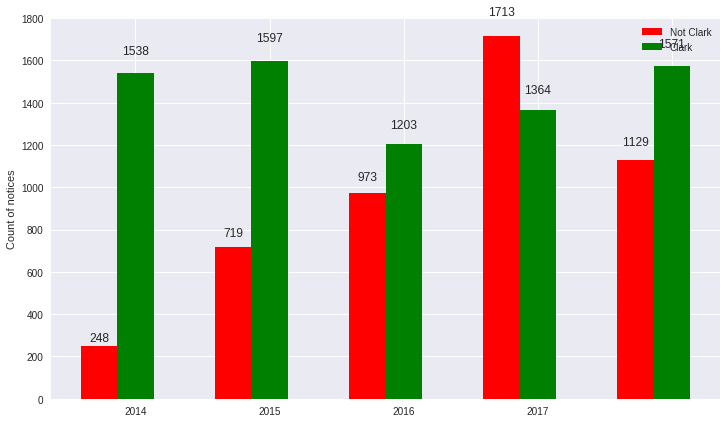

In [0]:
N = len(p)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = m
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Count of notices')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2014','2015','2016','2017') )
ax.legend( (rects1[0], rects2[0]), ('Not Clark', 'Clark') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


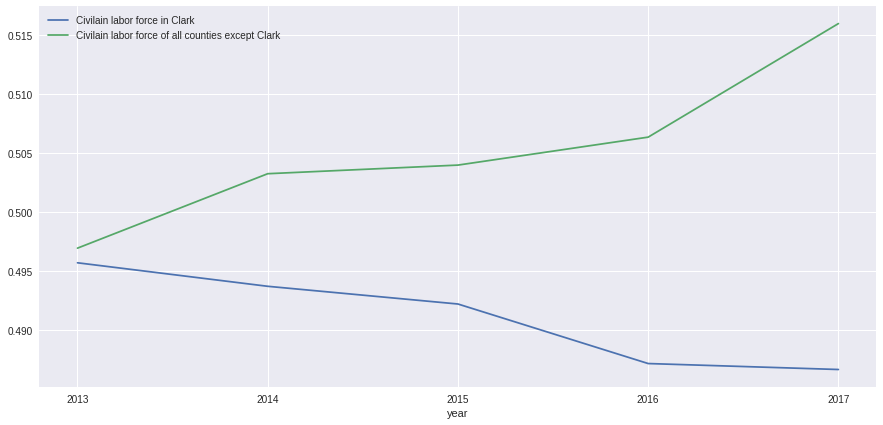

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([2013,2014,2015,2016,2017],['2013','2014','2015','2016','2017'])
temp_df_m['labor_pop'] = temp_df_m['Civilian_labor_force']/temp_df_m['POP_ESTIMATE']
m = temp_df_m.groupby(['year']).mean()['labor_pop']
m.plot(ax=ax, kind='line',label='Civilain labor force in Clark')

temp_df_p['labor_pop'] = temp_df_p['Civilian_labor_force']/temp_df_p['POP_ESTIMATE']
p = temp_df_p.groupby(['year']).mean()['labor_pop']
p.plot(ax=ax, kind='line',label='Civilain labor force of all counties except Clark')
plt.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


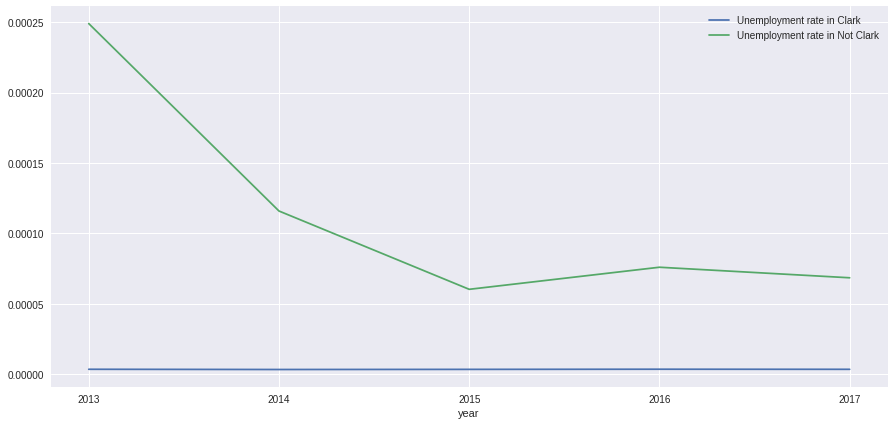

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([2013,2014,2015,2016,2017],['2013','2014','2015','2016','2017'])
temp_df_m['labor_pop'] = temp_df_m['R_death']/temp_df_m['POP_ESTIMATE']
m = temp_df_m.groupby(['year']).mean()['labor_pop']
m.plot(ax=ax, kind='line',label='Unemployment rate in Clark')

temp_df_p['labor_pop'] = temp_df_p['R_death']/temp_df_p['POP_ESTIMATE']
p = temp_df_p.groupby(['year']).mean()['labor_pop']
p.plot(ax=ax, kind='line',label='Unemployment rate in Not Clark')
plt.legend(loc='best')

In [0]:
counties = ['Clark', 'Not Clark'] 
years = [2013,2014,2015,2016,2017]
annualLaborForceDelta = {county:{key:0 for key in years} for county in counties}

for county in counties:
  if county == 'Clark':
    countyDf = temp_df[temp_df['county'].isin([county])]
  else:
    countyDf = temp_df[~temp_df['county'].isin([county])]
  countyDf['labor_pop'] = (countyDf['Civilian_labor_force']/countyDf['POP_ESTIMATE'])*100000
  laborPopAnnual = countyDf.groupby(['year']).mean()['labor_pop']
  for i, year in enumerate(years):
    annualLaborForceDelta[county][year] = (laborPopAnnual[year] - laborPopAnnual[years[i-1]]) if i !=0 else 0
print(annualLaborForceDelta)

{'Clark': {2013: 0, 2014: -199.56519982409372, 2015: -150.30695840154658, 2016: -505.35420621625235, 2017: -50.57842830273148}, 'Not Clark': {2013: 0, 2014: -258.1975730332415, 2015: 887.6667710415932, 2016: -390.3403121263691, 2017: 277.63896050721087}}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


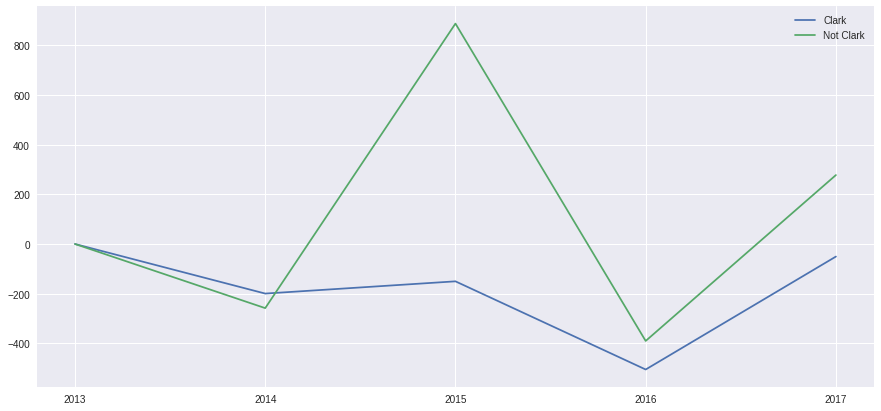

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([2013,2014,2015,2016,2017],['2013','2014','2015','2016','2017'])

for county in counties:
  lists = sorted(annualLaborForceDelta[county].items())
  x, y = zip(*lists)
  plt.plot(x, y, label=county)
  
plt.legend(loc='best')